In [2]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [2]:
#This is our source file with inspection data as of March 20, 2019
file = 'DOHMH_New_York_City_Restaurant_Inspection_Results.csv'

In [3]:
#Read csv file into nyc_inspect and list columns
nyc_inspect = pd.read_csv(file, encoding="ISO-8859-1")
nyc_inspect.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [4]:
#check the first 5 rows
nyc_inspect.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50035269,FRESCO TORTILLAS,QUEENS,3112,36TH AVE,11106.0,7182679536,Tex-Mex,02/15/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,02/15/2019,03/20/2019,Cycle Inspection / Initial Inspection
1,40861669,NEW VICTORY RESTAURANT,BROOKLYN,4803,5 AVENUE,11220.0,7184312938,Chinese,02/21/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/21/2019,03/20/2019,Cycle Inspection / Re-inspection
2,50010567,CUSP,BROOKLYN,321,7TH AVE,11215.0,7187882980,CafÃÂ©/Coffee/Tea,03/23/2018,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8.0,A,03/23/2018,03/20/2019,Cycle Inspection / Re-inspection
3,40821227,SABOR A MEXICO,MANHATTAN,1744,FIRST AVENUE,10128.0,2122892641,Mexican,12/08/2015,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,7.0,A,12/08/2015,03/20/2019,Cycle Inspection / Initial Inspection
4,50050905,BY CHLOE,MANHATTAN,60,W 22ND ST,10010.0,6463584021,Vegetarian,12/22/2017,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,24.0,NaN,NaN,03/20/2019,Cycle Inspection / Initial Inspection


In [6]:
#count values in each column
nyc_inspect.count()
#starting with 385386

CAMIS                    385386
DBA                      384841
BORO                     385386
BUILDING                 385158
STREET                   385383
ZIPCODE                  379585
PHONE                    385379
CUISINE DESCRIPTION      385386
INSPECTION DATE          385386
ACTION                   383967
VIOLATION CODE           379351
VIOLATION DESCRIPTION    377075
CRITICAL FLAG            385386
SCORE                    366488
GRADE                    194272
GRADE DATE               192672
RECORD DATE              385386
INSPECTION TYPE          383967
dtype: int64

In [9]:
#Find out how many inspection types
nyc_inspect["INSPECTION TYPE"].value_counts()

Cycle Inspection / Initial Inspection                          222649
Cycle Inspection / Re-inspection                                93005
Pre-permit (Operational) / Initial Inspection                   26327
Pre-permit (Operational) / Re-inspection                        11960
Administrative Miscellaneous / Initial Inspection                7064
Cycle Inspection / Reopening Inspection                          4343
Pre-permit (Non-operational) / Initial Inspection                3576
Smoke-Free Air Act / Initial Inspection                          3025
Administrative Miscellaneous / Re-inspection                     2227
Trans Fat / Initial Inspection                                   2017
Pre-permit (Operational) / Compliance Inspection                 1236
Calorie Posting / Initial Inspection                             1128
Inter-Agency Task Force / Initial Inspection                     1006
Pre-permit (Operational) / Reopening Inspection                   977
Cycle Inspection / C

In [11]:
#Filter out restaurant not yet in business
nyc_inspect = nyc_inspect.rename(columns={"INSPECTION DATE":"INSPECTION_DATE"})
current_nyc_inspect = nyc_inspect[nyc_inspect.INSPECTION_DATE != "01/01/1900"]
current_nyc_inspect.count()

CAMIS                    383967
DBA                      383967
BORO                     383967
BUILDING                 383745
STREET                   383967
ZIPCODE                  378186
PHONE                    383963
CUISINE DESCRIPTION      383967
INSPECTION_DATE          383967
ACTION                   383967
VIOLATION CODE           379351
VIOLATION DESCRIPTION    377075
CRITICAL FLAG            383967
SCORE                    366488
GRADE                    194272
GRADE DATE               192672
RECORD DATE              383967
INSPECTION TYPE          383967
dtype: int64

In [14]:
#filter out all inspection types other than cycle inspections to foucs on cleanliness inspections only
current_nyc_inspect = current_nyc_inspect.rename(columns={"INSPECTION TYPE":"INSPECTION_TYPE"})
current_nyc_cycle = current_nyc_inspect[current_nyc_inspect.INSPECTION_TYPE.str.contains('Cycle Inspection') == True]
current_nyc_cycle["INSPECTION_TYPE"].value_counts()

Cycle Inspection / Initial Inspection              222649
Cycle Inspection / Re-inspection                    93005
Cycle Inspection / Reopening Inspection              4343
Cycle Inspection / Compliance Inspection              932
Cycle Inspection / Second Compliance Inspection        28
Name: INSPECTION_TYPE, dtype: int64

In [15]:
#change values "Inspection date" column to datetime format
current_nyc_cycle['INSPECTION_DATE'] = pd.to_datetime(current_nyc_cycle['INSPECTION_DATE'])
#group data by CAMIS (unique identifer) based on latest inspection date
final_nyc_inspect = current_nyc_cycle.loc[current_nyc_cycle.groupby('CAMIS')['INSPECTION_DATE'].idxmax()]
final_nyc_inspect.head()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE
71960,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection
119570,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection
113844,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection
212732,40356018,RIVIERA CATERERS,BROOKLYN,2780,STILLWELL AVENUE,11224.0,7183723031,American,2018-10-30,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,10/30/2018,03/20/2019,Cycle Inspection / Initial Inspection
5948,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369.0,7183350505,American,2018-10-06,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,45.0,NaN,NaN,03/20/2019,Cycle Inspection / Initial Inspection


In [23]:
#total number of unique establishments
final_nyc_inspect["CAMIS"].count()

22770

In [12]:
#Write final data frame to csv file
final_nyc_inspect.to_csv("final_nyc_inspect.csv", index=False, header=True)

In [24]:
#total number of cuisine types
rest_num_cuisine = final_nyc_inspect["CUISINE DESCRIPTION"].value_counts()
len(rest_num_cuisine)

85

In [10]:
#number of occurence by "action"
rest_num_CAMIS = nyc_inspect["ACTION"].value_counts()
rest_num_CAMIS

Violations were cited in the following area(s).                                                                                        360738
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.     13531
No violations were recorded at the time of this inspection.                                                                              4525
Establishment re-opened by DOHMH                                                                                                         3849
Establishment re-closed by DOHMH                                                                                                         1324
Name: ACTION, dtype: int64

In [33]:
#filter out no violation, close, open, re-close, & re-open "Action" types
violation_no_open_close1 = current_nyc_cycle[current_nyc_inspect.ACTION.str.contains('Establishment') == False]
violation_no_open_close = violation_no_open_close1[violation_no_open_close1.ACTION.str.contains('No') == False]
violation_no_open_close["ACTION"].value_counts()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Violations were cited in the following area(s).    305084
Name: ACTION, dtype: int64

In [35]:
#calculate total violation count per CAMIS 
violation = violation_no_open_close.groupby(["CAMIS"])["ACTION"].count()
violation_df = violation.to_frame(name="viocount")

,viocount
CAMIS,
30075445,6
30112340,20
30191841,14
40356018,7
40356151,8


In [38]:
# create bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

#create names for the bins
group_names = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75" ]

In [44]:
# frequency of violations
violation_df["count"] = pd.cut(violation_df["Viocount"], bins, labels=group_names)
violation_df["count"].value_counts()

5-10     5600
0-5      4754
10-15    4621
15-20    3164
20-25    2054
25-30    1281
30-35     648
35-40     317
40-45     181
45-50      65
50-55      37
55-60      11
60-65       5
65-70       4
70-75       2
Name: count, dtype: int64

# Statistical Analyses

### 1. Regression analysis to determine if "violation count" is correlated with "inspection score. 

In [72]:
#create "score" dataframe
score = final_nyc_inspect[["CAMIS", "SCORE"]]
score.set_index("CAMIS", inplace=True)

In [74]:
#merge score dataframe with violation count dataframe
score_vio_count = pd.merge(violation_df, score, on="CAMIS", how="outer")
score_vio_count = score_vio_count.dropna(how='any')
score_vio_count.head()

,viocount,SCORE
CAMIS,,
30075445,6.0,5.0
30112340,20.0,13.0
30191841,14.0,12.0
40356018,7.0,10.0
40356151,8.0,45.0


In [55]:
#import libraries
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [76]:
#run regression analysis to calculate r-squared

x_axis = score_vio_count["viocount"]
y_axis = score_vio_count["SCORE"]
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
r_squared = r_value**2
print(f"R value is {r_value} and R squared is {r_squared}")

R value is 0.3071984368504232 and R squared is 0.09437087960334345


#### Insights from the above regression analysis:
Intuitively, establishments' number of violations should be highly correlated with their inspection score. However, regression analysis showed that their r-value is only 0.307 with a r-square of 0.0943. This can be explained by "Each violation is associated with a range of points depending on the type and extent of the violation, and the risk it poses to the public." Based on this analysis, we have concluded that "SCORE" is a more accurate measure than "# of violations", therefore, we should use "SCORE" for our analysis.

### 2. Null Hypothesis t test

#### Hypothesis - If highly rated restaurants are clean restaurants, then 4 to 5-star restaurants in Yelp will have an inspection score of less than 15. 

#### Null Hypothesis - If highly rated restaurants are as clean as all other restaurants, then 4 to 5-star restaurants in Yelp will have various inspection scores. 

In [10]:
#read csv file with all NYC inspection and Yelp data
hypothesis = pd.read_csv("nyc_pr_20k_plus_colorsprice.csv")
hypothesis.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ,boro_color
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41,2,blue
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36,1,green
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99,2,aqua
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37,2,green
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31,1,green


In [11]:
#create first group named "population" include all restaurants with their inspection scores
population = hypothesis["SCORE"]

In [13]:
#create second group named "sample" include only restaurants with ratings 4 or higher and their inspection scores
sample = hypothesis.loc[hypothesis["Average Rating"] >= 4,["SCORE"]]
sample = sample["SCORE"]

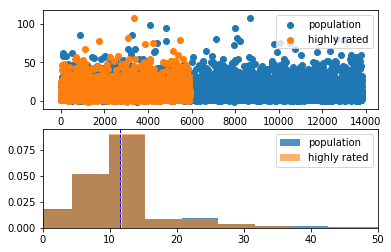

In [7]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population)), population, label="population")
plt.scatter(range(len(sample)), sample, label="highly rated")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, alpha=0.8, density=True, align="mid", label="population")
plt.hist(sample, 20, alpha=0.6, density=True, align="mid", label="highly rated")
plt.xlim(0, 50)
plt.axvline(population.mean(), color='w', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend()    

In [14]:
#perform t test
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-1.5097937259811067, pvalue=0.1311494890180032)